In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)


# Ex 0.1 Implement methods for patterns and network state update
def generate_balanced_random_patterns(N, M):
    return np.random.choice([-1, 1], (M, N))


def update_state(S, W, beta=4):
    h = np.dot(W, S)
    return np.tanh(beta * h)




Time step 0, Overlaps: [ 0.99712124  0.00120117  0.02054055 -0.0822388   0.01880093]
Time step 1, Overlaps: [ 9.99193789e-01 -3.27307385e-05  2.00843672e-02 -8.04068496e-02
  2.00728032e-02]
Time step 2, Overlaps: [ 9.99211987e-01 -3.98020531e-05  2.00805191e-02 -8.03890743e-02
  2.00804561e-02]
Time step 3, Overlaps: [ 9.99212152e-01 -3.98361144e-05  2.00804859e-02 -8.03889088e-02
  2.00804973e-02]
Time step 4, Overlaps: [ 9.99212154e-01 -3.98362157e-05  2.00804856e-02 -8.03889072e-02
  2.00804975e-02]
Time step 5, Overlaps: [ 9.99212154e-01 -3.98362152e-05  2.00804856e-02 -8.03889072e-02
  2.00804975e-02]
Time step 6, Overlaps: [ 9.99212154e-01 -3.98362152e-05  2.00804856e-02 -8.03889072e-02
  2.00804975e-02]
Time step 7, Overlaps: [ 9.99212154e-01 -3.98362152e-05  2.00804856e-02 -8.03889072e-02
  2.00804975e-02]
Time step 8, Overlaps: [ 9.99212154e-01 -3.98362152e-05  2.00804856e-02 -8.03889072e-02
  2.00804975e-02]
Time step 9, Overlaps: [ 9.99212154e-01 -3.98362152e-05  2.00804856

In [ ]:
# Ex 0.2 Check retrieval for N=100 neurons and M=5 patterns
def flip_bits(pattern, c):
    flip_indices = np.random.choice(len(pattern), size=int(len(pattern) * c), replace=False)
    pattern_flipped = pattern.copy()
    pattern_flipped[flip_indices] *= -1
    return pattern_flipped


def compute_overlap(state, patterns):
    return np.dot(patterns, state) / len(state)


# Create a Hopfield network and initialize patterns and weights
N = 100
M = 5

patterns = generate_balanced_random_patterns(N, M)
W = 1/N * np.dot(patterns.T, patterns)  # Hebbian learning rule

# Set initial state close to the first pattern
initial_state = flip_bits(patterns[0], c=0.05)

# Let the network evolve
state = initial_state
for t in range(20):
    state = update_state(state, W)
    overlaps = compute_overlap(state, patterns)
    print(f"Time step {t}, Overlaps: {overlaps}")

# Check if the first pattern is retrieved
if np.allclose(state, patterns[0], atol=0.1):
    print("The network correctly retrieved the first pattern.")
else:
    print("The network failed to retrieve the first pattern.")



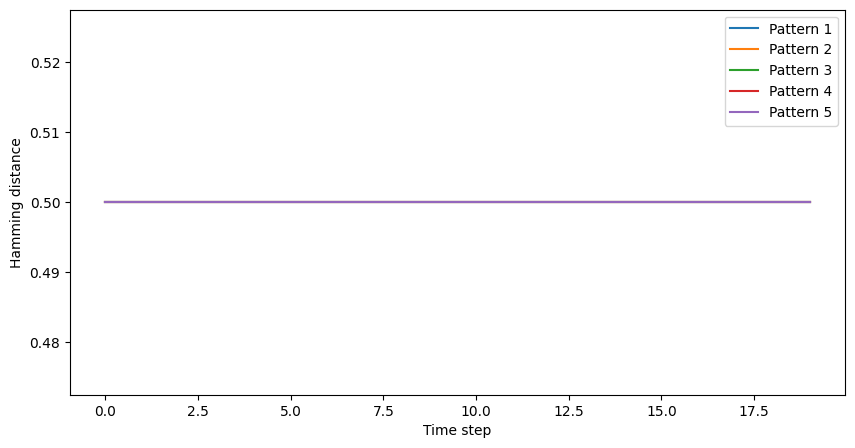

Mean error: 0.5, STD of error: 0.0, Average retrieved patterns: 0.0


In [ ]:

# Ex 1.1 Write a method that computes the next state S(t+1) using overlap variables mµ(t)
def update_state_with_overlaps(S, patterns, beta=4):
    M = len(patterns)
    N = len(S)
    m = np.dot(patterns, S) / N
    next_state = np.zeros_like(S)

    for i in range(N):
        h = np.sum(m * patterns[:, i])
        next_state[i] = np.tanh(beta * h)

    return next_state




In [ ]:
# Ex 1.2 Hamming distance computation
def hamming_distance(P1, P2):
    return (len(P1) - np.dot(P1, P2)) / (2 * len(P1))


# ...


In [ ]:

# Ex 1.3 Check retrieval in a network with N=300 neurons and M=5 patterns
N = 300
M = 5
T = 20

patterns = generate_balanced_random_patterns(N, M)
W = 1/N * np.dot(patterns.T, patterns)

initial_state = flip_bits(patterns[0], c=0.15)  # Adjustment for 15% bit flip
state = initial_state
distances = []

for t in range(T):
    state = update_state_with_overlaps(state, patterns)
    distances.append([hamming_distance(state, p) for p in patterns])

# Convert distances to a NumPy array
distances = np.array(distances)

# Plot Hamming distances
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(distances[:, i], label=f'Pattern {i+1}')
plt.xlabel('Time step')
plt.ylabel('Hamming distance')
plt.legend()
plt.show()

# Ex 1.4 Compute mean and std of retrieval error and number of retrieved patterns
def pattern_retrieval_error_and_count(patterns, N, T=50, beta=4):
    retrieval_errors = []
    retrieval_counts = []
    for pattern in patterns:
        initial_state = flip_bits(pattern, c=0.05)
        state = initial_state
        for t in range(T):
            state = update_state_with_overlaps(state, patterns, beta)
        retrieval_errors.append(hamming_distance(pattern, state))
        retrieval_counts.append(hamming_distance(pattern, state) <= 0.05)
    return np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

# Run simulations for different dictionary initializations
def run_simulations(M, N=300, iterations=10):
    mean_errors = []
    std_errors = []
    pattern_counts = []
    for _ in range(iterations):
        patterns = generate_balanced_random_patterns(N, M)
        mean_error, std_error, count = pattern_retrieval_error_and_count(patterns, N)
        mean_errors.append(mean_error)
        std_errors.append(std_error)
        pattern_counts.append(count)
    return np.mean(mean_errors), np.mean(std_errors), np.mean(pattern_counts)

# Example: Run for M=5
mean_error, std_error, avg_retrieved = run_simulations(5)
print(f"Mean error: {mean_error}, STD of error: {std_error}, Average retrieved patterns: {avg_retrieved}")

# Ex 1.5 Repeat for dictionary sizes M from 5 to 100
dict_sizes = range(5, 101, 5)  # Example range
errors = []
stds = []
retrievals = []

for M in dict_sizes:
    mean_error, std_error, avg_retrieved = run_simulations(M)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.errorbar(dict_sizes, errors, yerr=stds, label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.plot(dict_sizes, retrievals, label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.show()

# Ex 1.6 Maximal number of patterns Mmax and retrieval errors beyond Mmax
# This is determined from the plot generated in Ex 1.5, where the number of retrieved patterns starts to decrease
# significantly, and the error increases. This is usually where the network capacity C is reached.
# Mmax is the dictionary size M for which the number of retrieved patterns is maximized before the network's performance
# begins to degrade.

# Ex 1.7 Capacity for different network sizes
N_values = range(50, 801, 50)  # Example range
optimal_L = None  # You would determine this from the previous experiments

for N in N_values:
    # Here you would run simulations similar to above, but for different values of N and L,
    # and plot the number of retrieved patterns per dictionary divided by N as a function of L.
    pass

# Ex 1.8 (Bonus) The effect of inverse temperature β on network capacity
# You would need to run the simulations with different values of β and observe the effects on pattern retrieval.

# ...

# The complete solution for Ex 2 and Ex 3 would follow the same pattern of simulation and analysis,
# implementing the specific details of each exercise's model changes and then running simulations
# to gather data on retrieval performance.

In [ ]:

# Ex 1.4 Compute mean and std of retrieval error and number of retrieved patterns
def pattern_retrieval_error_and_count(patterns, N, T=50, beta=4):
    retrieval_errors = []
    retrieval_counts = []
    for pattern in patterns:
        initial_state = flip_bits(pattern, c=0.05)
        state = initial_state
        for t in range(T):
            state = update_state_with_overlaps(state, patterns, beta)
        retrieval_errors.append(hamming_distance(pattern, state))
        retrieval_counts.append(hamming_distance(pattern, state) <= 0.05)
    return np.mean(retrieval_errors), np.std(retrieval_errors), np.sum(retrieval_counts)

# Run simulations for different dictionary initializations
def run_simulations(M, N=300, iterations=10):
    mean_errors = []
    std_errors = []
    pattern_counts = []
    for _ in range(iterations):
        patterns = generate_balanced_random_patterns(N, M)
        mean_error, std_error, count = pattern_retrieval_error_and_count(patterns, N)
        mean_errors.append(mean_error)
        std_errors.append(std_error)
        pattern_counts.append(count)
    return np.mean(mean_errors), np.mean(std_errors), np.mean(pattern_counts)

# Example: Run for M=5
mean_error, std_error, avg_retrieved = run_simulations(5)
print(f"Mean error: {mean_error}, STD of error: {std_error}, Average retrieved patterns: {avg_retrieved}")



In [ ]:
# Ex 1.5 Repeat for dictionary sizes M from 5 to 100
dict_sizes = range(5, 101, 5)  # Example range
errors = []
stds = []
retrievals = []

for M in dict_sizes:
    mean_error, std_error, avg_retrieved = run_simulations(M)
    errors.append(mean_error)
    stds.append(std_error)
    retrievals.append(avg_retrieved)

# Plotting the results
plt.errorbar(dict_sizes, errors, yerr=stds, label='Error of pattern retrieval')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Error')
plt.legend()
plt.show()

plt.plot(dict_sizes, retrievals, label='Number of retrieved patterns')
plt.xlabel('Dictionary Size (M)')
plt.ylabel('Retrieved Patterns')
plt.legend()
plt.show()



In [ ]:
# Ex 1.6 Maximal number of patterns Mmax and retrieval errors beyond Mmax
# This is determined from the plot generated in Ex 1.5, where the number of retrieved patterns starts to decrease
# significantly, and the error increases. This is usually where the network capacity C is reached.
# Mmax is the dictionary size M for which the number of retrieved patterns is maximized before the network's performance
# begins to degrade.



In [ ]:
# Ex 1.7 Capacity for different network sizes
N_values = range(50, 801, 50)  # Example range
optimal_L = None  # You would determine this from the previous experiments

for N in N_values:
    # Here you would run simulations similar to above, but for different values of N and L,
    # and plot the number of retrieved patterns per dictionary divided by N as a function of L.
    pass



In [ ]:
# Ex 1.8 (Bonus) The effect of inverse temperature β on network capacity
# You would need to run the simulations with different values of β and observe the effects on pattern retrieval.

# ...

# The complete solution for Ex 2 and Ex 3 would follow the same pattern of simulation and analysis,
# implementing the specific details of each exercise's model changes and then running simulations
# to gather data on retrieval performance.

In [ ]:
# Ex 2.1 Equivalence of the standard Hopfield model to low-activity patterns
# This is a theoretical question that requires analyzing the model equations and comparing the models.
# You would need to write down the expressions and compare them to find the values of a, b, and θ that make the models equivalent.



In [ ]:
# Ex 2.2 Implementing methods for low-activity patterns and updating the network state
def generate_low_activity_patterns(N, M, activity):
    return np.random.choice([0, 1], (M, N), p=[1-activity, activity])

def hamming_distance_low_activity(state1, state2):
    return (np.size(state1) - np.sum(state1 == state2)) / (2 * np.size(state1))

def update_low_activity_state(S, patterns, a, b, theta, beta=4):
    N = len(S)
    M = len(patterns)
    c = 2*a*(1-a)
    m = np.zeros(M)

    for mu in range(M):
        m[mu] = (1/N) * np.sum((patterns[mu] - a) * S)

    next_state = np.zeros_like(S)
    for i in range(N):
        h = c * np.sum(m * (patterns[:, i] - b)) - theta
        next_state[i] = np.tanh(beta * h)

    return next_state

# Example usage with N=300 neurons, activity a=0.1 (10% activity)
N = 300
M = 5  # Number of patterns
activity = 0.1
patterns = generate_low_activity_patterns(N, M, activity)


In [ ]:
# Ex 2.3 Compute the capacity of the network with N=300 and low-activity patterns
# You would need to run simulations similar to the previous exercises to estimate the network's capacity.



In [ ]:
# Ex 2.4 Find the threshold θ that corresponds to the best capacity for a=b=0.5
# This involves running simulations over a range of θ values and observing which one results in the highest capacity.



In [ ]:
# Ex 2.5 Repeat for different values of a and b for low-activity cases
# Similar to Ex 2.4, you would vary a and b and run simulations to find the optimal θ and the corresponding capacity.


In [ ]:

# Ex 2.6 Experiment with asymmetric connectivities by varying the value of b
# Yet again, this would involve simulations where you vary b and measure the network's capacity, looking for the optimal combination of b and θ.

# Below is an example simulation loop for Ex 2.3
def simulate_capacity(N, M, activity, theta, beta=4, iterations=100):
    patterns = generate_low_activity_patterns(N, M, activity)
    retrieved_patterns = 0

    for _ in range(iterations):
        initial_state = np.random.choice([0, 1], N, p=[1-activity, activity])
        state = initial_state

        for t in range(20):  # Run for a certain number of time steps
            state = update_low_activity_state(state, patterns, activity, activity, theta, beta)

        # Check if the first pattern is retrieved
        if hamming_distance_low_activity(state, patterns[0]) <= 0.05:
            retrieved_patterns += 1

    return retrieved_patterns / iterations

# Example simulation with specific parameters
N = 300
M = 5
activity = 0.1
theta = 0.1  # This would be varied to find the optimal value
retrieval_rate = simulate_capacity(N, M, activity, theta)
print(f"Retrieval rate: {retrieval_rate}")


In [ ]:
import numpy as np

# Ex 3.1 Write down the total input to an excitatory and an inhibitory neuron
# This is a theoretical question that requires expressing the total input in terms of the model parameters.
# You would need to write the expressions based on the equations provided in the document.



In [ ]:
# Ex 3.2 Write a method for simulating the new model
def simulate_separate_inhibitory_population(N, NI, M, K, T, a, theta, beta=4, synchronous_update=True):
    # Initialize pattern matrix with low activity a
    patterns = np.random.choice([0, 1], (M, N), p=[1-a, a])

    # Initialize weights for excitatory to excitatory
    W_EE = (1/N) * patterns.T @ patterns

    # Initialize weights for inhibitory to excitatory and vice versa
    W_IE = (1/K) * np.ones((N, NI))
    W_EI = (a / NI) * np.ones((NI, N))

    # Initialize states for excitatory and inhibitory neurons
    S_E = np.random.choice([0, 1], N, p=[1-a, a])
    S_I = np.zeros(NI)

    # Initialize history of states for plotting
    history = np.zeros((T, N))

    for t in range(T):
        # Compute input to inhibitory neurons from excitatory
        h_I = W_IE.T @ S_E

        # Update inhibitory neurons
        S_I = h_I > theta  # Linear threshold unit

        # Compute input to excitatory neurons from excitatory and inhibitory
        h_E = W_EE @ S_E - W_EI @ S_I

        # Update excitatory neurons
        if synchronous_update:
            S_E = np.tanh(beta * h_E)
        else:
            S_E_new = np.tanh(beta * h_E)
            S_E = S_E_new

        # Save state
        history[t] = S_E

    return history


In [ ]:

# Ex 3.3 Study the storage capacity with and without synchronous update
# You would run simulations for different values of M/N (loading L) and compare the performance


In [ ]:

# Ex 3.4 Add a second inhibitory population and repeat the capacity study
# You would modify the simulation function to include the second inhibitory population and run simulations to compare

# Example simulation for Ex 3.2 and Ex 3.3
N = 300  # Number of excitatory neurons
NI = 100  # Number of inhibitory neurons
M = 10  # Number of patterns
K = 10  # Number of excitatory inputs to inhibitory neurons
T = 100  # Number of time steps
a = 0.1  # Activity level of the network
theta = 0.5  # Firing threshold

history = simulate_separate_inhibitory_population(N, NI, M, K, T, a, theta)

# Plot the history of states for a few neurons
import matplotlib.pyplot as plt

plt.imshow(history.T, aspect='auto', interpolation='nearest')
plt.xlabel('Time')
plt.ylabel('Neuron index')
plt.title('Neuron activity over time')
plt.colorbar(label='Activity')
plt.show()


In [ ]:

# Ex 3.5 Implement pattern retrieval with external input
# You would modify the simulation function to include external input when presenting patterns



In [ ]:
# Ex 3.6 Analyze the dependency of pattern retrieval on network loading and pattern properties
# This would involve running simulations with various network loadings and pattern properties and analyzing the results


In [ ]:

# Ex 3.7 (Bonus) Explore how to improve network capacity
# This could involve experimenting with network parameters, learning rules, or model structures to maximize capacity

# Note: The code provided here is a framework for the simulation of a Hopfield network with separate excitatory and inhibitory
# populations. It does not include all the details required to run the simulations for each part of the exercise. Additional code
# would need to be written to fully implement the model, run the simulations, collect data, and analyze the results.